Clustering analysis

In [1]:
import seaborn as sns; sns.set(color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/combined.csv'
df=pd.read_csv(url,index_col='FIPS',encoding="ISO-8859-1")

In [29]:
#read in variable information and build variable information dictionary with variable names as key
url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/Var_name_info.csv'
var_info_df=pd.read_csv(url,encoding="ISO-8859-1", index_col='variable')

In [95]:
number_null_values_percol=df.isnull().sum(axis=0)
#columns with over 100 missing values
cols_with_over_1_percent_null_values=number_null_values_percol[number_null_values_percol>0.01*df.shape[0]]
print (cols_with_over_1_percent_null_values.index)

Index(['var1', 'var28', 'var29', 'var41', 'var43', 'var54', 'var57'], dtype='object')


In [96]:
df=df.drop(cols_with_over_1_percent_null_values.index, axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3141 entries, 1001 to 56045
Data columns (total 50 columns):
State                                3141 non-null object
County                               3141 non-null object
var1                                 3094 non-null float64
var14                                3141 non-null float64
var15                                3141 non-null float64
var16                                3141 non-null float64
var17                                3141 non-null float64
var18                                3141 non-null float64
var19                                3141 non-null float64
var20                                3141 non-null float64
var21                                3141 non-null float64
var22                                3141 non-null float64
var23                                3141 non-null float64
var26                                3141 non-null float64
var27                                3141 non-null float64
var28 

In [31]:
from sklearn import preprocessing
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [97]:
df=df[df.columns.difference(['State', 'County', 'RUCC_2013'])]

In [98]:
#drop these columns first
df=df.dropna()

In [99]:
df.columns

Index(['frac_uninsured', 'prevalence of diabetes', 'prevalence of obesity',
       'prevalence of physical inactivity', 'var14', 'var15', 'var16', 'var17',
       'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var26', 'var27',
       'var30', 'var31', 'var32', 'var33', 'var34', 'var35', 'var36', 'var37',
       'var38', 'var39', 'var40', 'var44', 'var58', 'var59', 'var60', 'var61',
       'var62', 'var63', 'var64', 'var65', 'var66', 'var67', 'var68', 'var69'],
      dtype='object')

In [1246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 1001 to 56045
Data columns (total 52 columns):
frac_uninsured                       3113 non-null float64
prevalence of diabetes               3113 non-null float64
prevalence of obesity                3113 non-null float64
prevalence of physical inactivity    3113 non-null float64
var10                                3113 non-null float64
var11                                3113 non-null float64
var12                                3113 non-null float64
var13                                3113 non-null float64
var14                                3113 non-null float64
var15                                3113 non-null float64
var16                                3113 non-null float64
var17                                3113 non-null float64
var18                                3113 non-null float64
var19                                3113 non-null float64
var2                                 3113 non-null float64
var2

In [100]:
min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(df.values)
normed_df=pd.DataFrame(X_minmax, index=df.index, columns=df.columns)

#normed_data=preprocessing.scale(df_dropnacol)
#normed_df=pd.DataFrame(normed_data, index=df_dropnacol.index, columns=df_dropnacol.columns)

# PCA

In [101]:
#PCA using Sklearn 
from sklearn.decomposition import PCA

explained_var=list()
for d in range(1,len(normed_df.columns)):
    pca = PCA(n_components=d)
    pca.fit(normed_df)
    explained_var.append(sum(pca.explained_variance_ratio_))

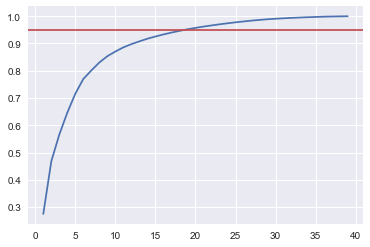

In [140]:
plt.plot(range(1,len(normed_df.columns)), explained_var)
plt.axhline(y=0.95, color='r')
plt.show()

In [141]:
#90% of variance can be explained by 11 components out of total 35 variables
pca = PCA(n_components=18)
pca.fit(normed_df)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [142]:
data_transformed=pca.transform(normed_df)
df_transformed=pd.DataFrame(data_transformed, index=normed_df.index)
X=df_transformed

# Hierachical clustering

In [17]:
from scipy.cluster.hierarchy import linkage,dendrogram, fcluster, leaves_list, set_link_color_palette

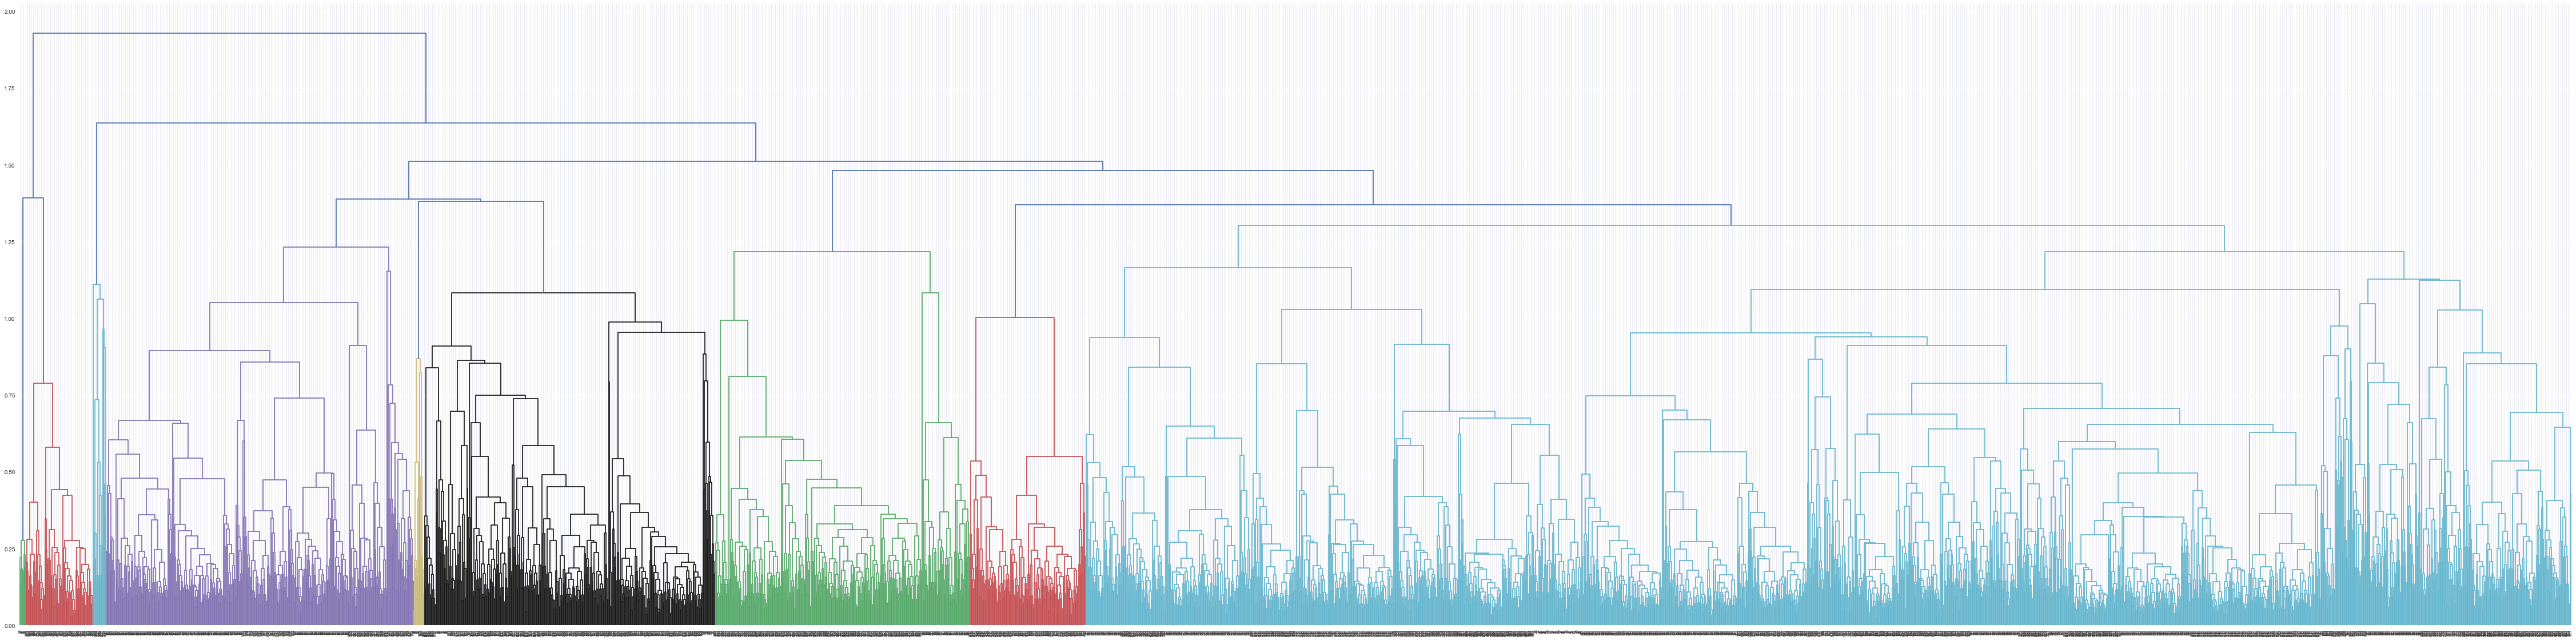

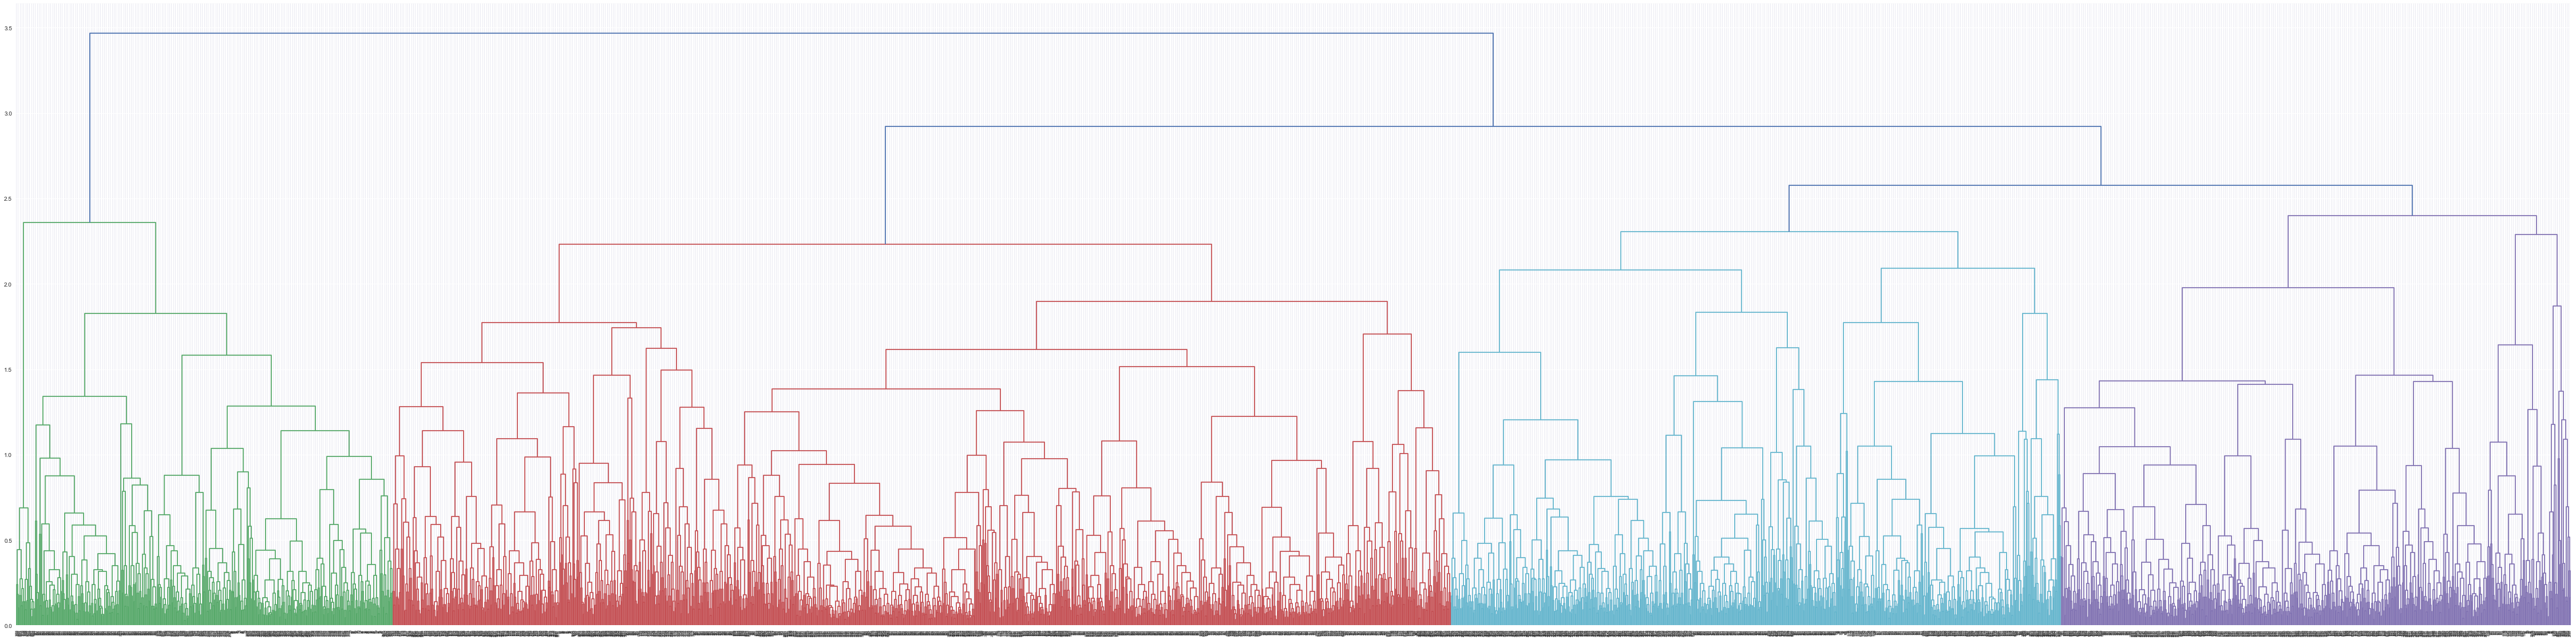

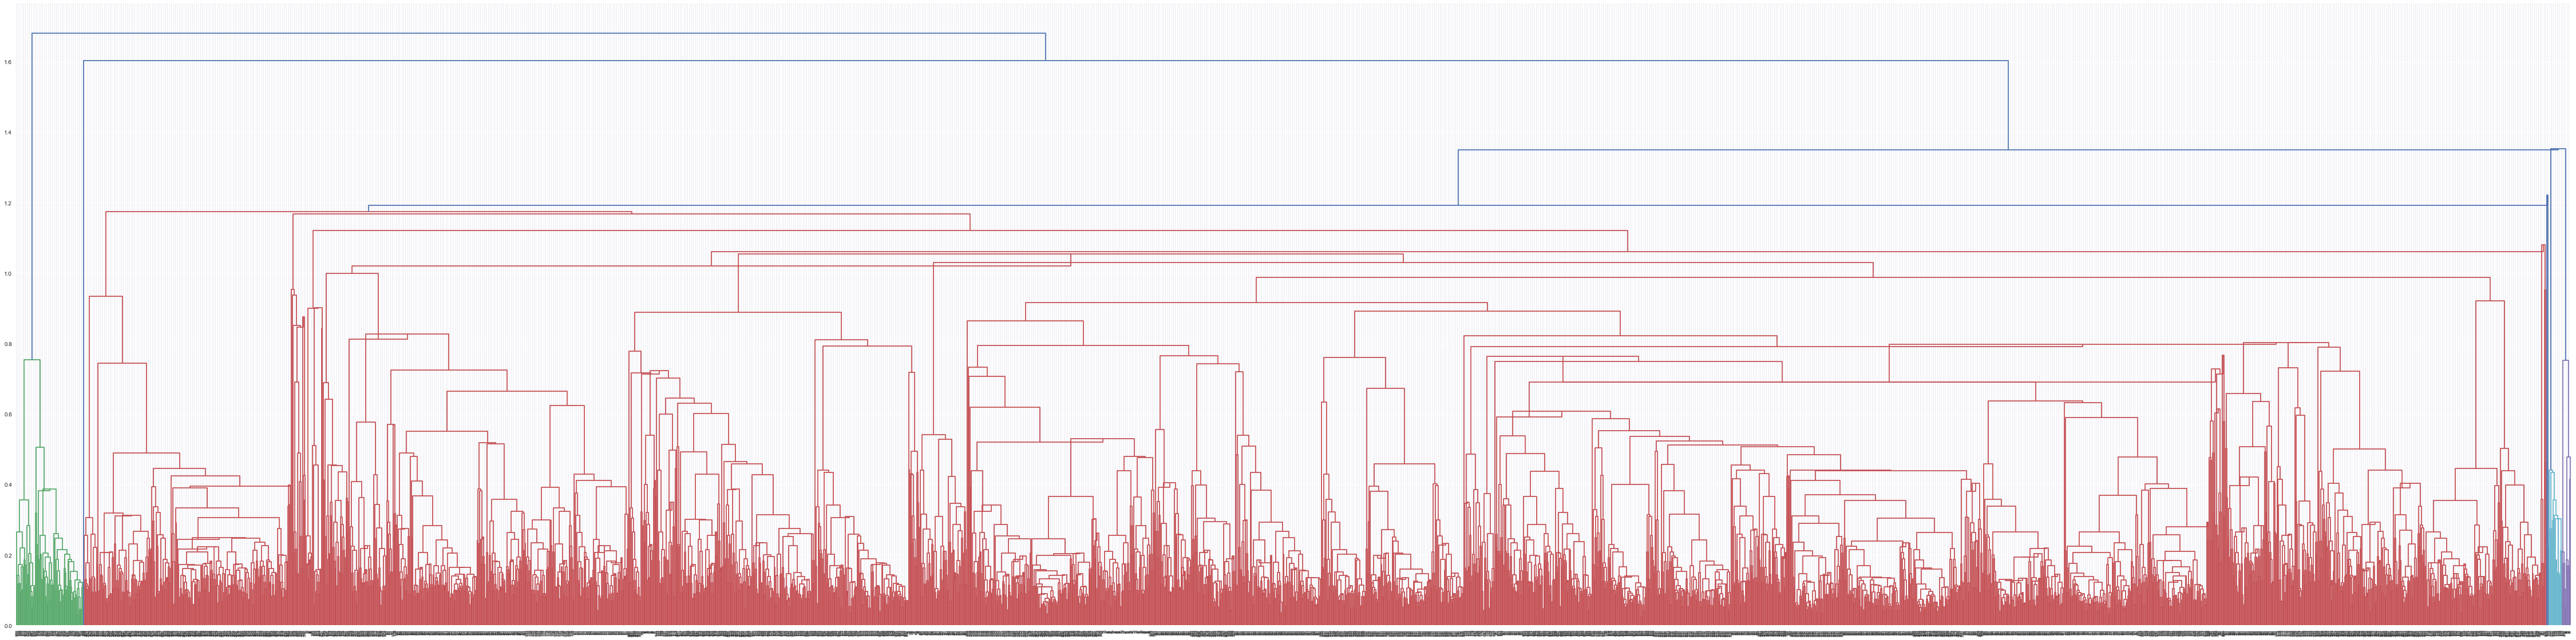

In [18]:
for method in ['average', 'complete', 'centroid']:
    plt.figure(figsize=(80,20))
    Z = linkage(X, method)
    dendrogram(Z)
    plt.show()

complete method gives the most tight clusters

In [150]:
Z = linkage(X, 'average')

from collections import Counter

for distance in np.linspace(0.1, 3, 20):
    labels = fcluster(Z,distance,'distance')
    print (distance, max(Counter(labels).values()), max(labels))

0.1 7 2866
0.252631578947 56 935
0.405263157895 108 347
0.557894736842 215 159
0.710526315789 334 92
0.863157894737 591 65
1.01578947368 935 32
1.16842105263 935 20
1.32105263158 1251 13
1.47368421053 2002 8
1.62631578947 3004 4
1.77894736842 3020 3
1.93157894737 3041 2
2.08421052632 3133 1
2.23684210526 3133 1
2.38947368421 3133 1
2.54210526316 3133 1
2.69473684211 3133 1
2.84736842105 3133 1
3.0 3133 1


In [152]:
distance=1.5
labels = fcluster(Z,distance,'distance')
print (Counter(labels), len(labels))

Counter({6: 2002, 5: 631, 7: 371, 1: 82, 3: 21, 4: 16, 2: 10}) 3133


In [56]:
group_colors=['yellow','blue','red','turquoise','pink','purple','green','grey']

C:\anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


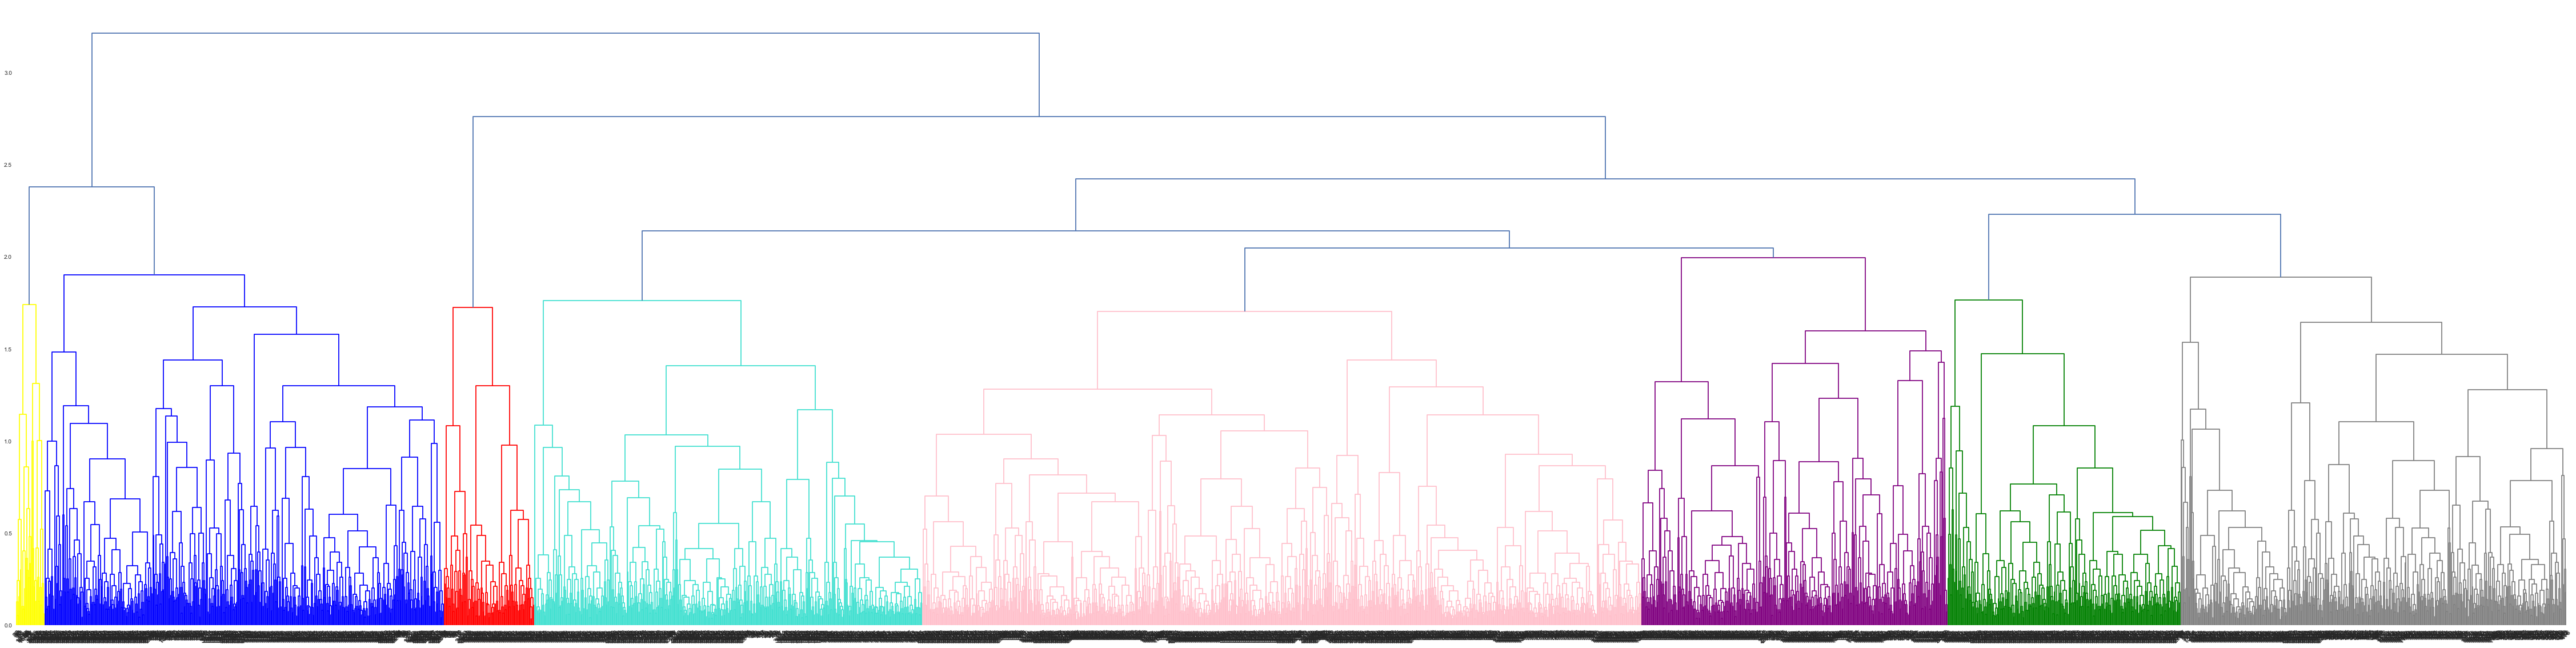

In [57]:
import seaborn as sns; sns.set()

f = plt.figure(facecolor="w", figsize=(80,20))
ax = f.add_subplot(111, axisbg="w")

set_link_color_palette(group_colors)
D = dendrogram(Z=Z, color_threshold=distance, leaf_font_size=12, leaf_rotation=45, ax=ax)
plt.show()

cut into several clusters to better understand each cluster

In [153]:
df['group']=labels

In [1271]:
df['group'].unique()

array([3, 8, 2, 5, 6, 7, 4, 1], dtype=int64)

In [1280]:
def Box_plot_by_var(features, df, by, order):
    n=1
    for c in features:
        if is_numeric_dtype(df[c]):
            if order==None:
                sns.boxplot(x=by, y=c, data=df)
            else:
                sns.boxplot(x=by, y=c, data=df, order=order)
            if c in var_info_df.index:
                plt.ylabel(str(var_info_df.loc[c]['Category Name'])+'\n'+str(var_info_df.loc[c]['Sub_subcategory Name']))            
            else: 
                plt.ylabel(c)
            plt.title(c)
            plt.legend()
            plt.show()
            n+=1

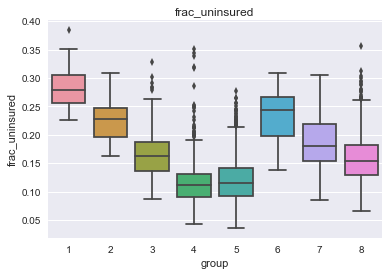

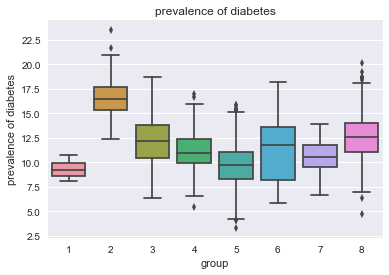

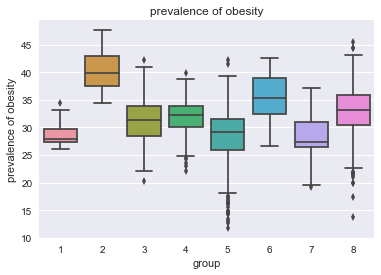

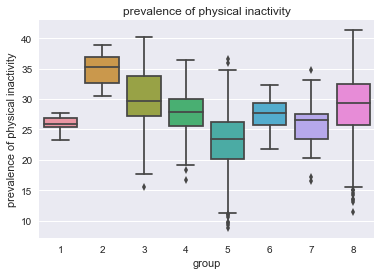

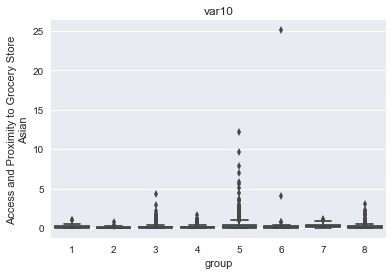

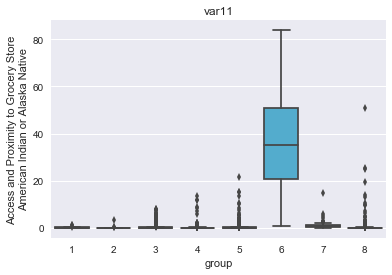

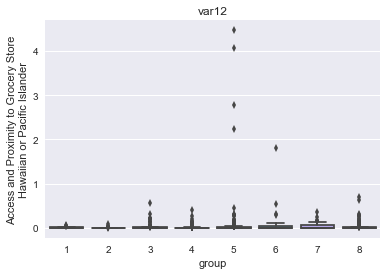

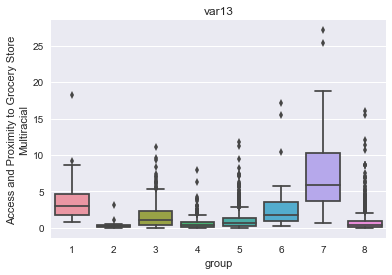

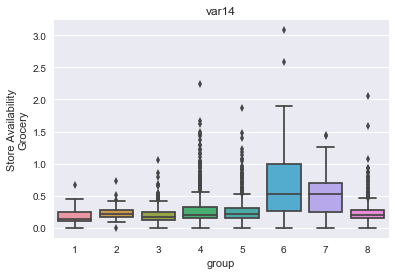

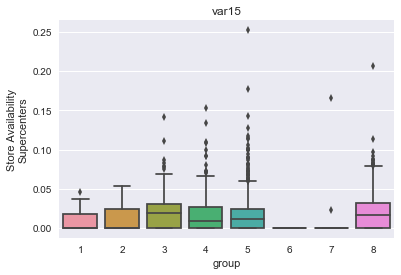

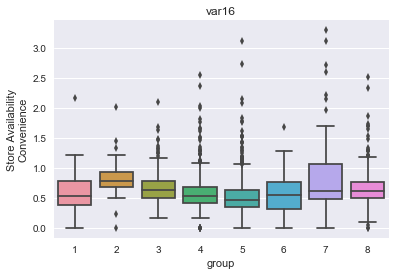

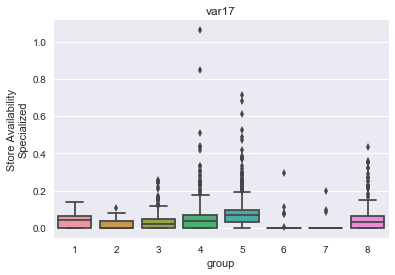

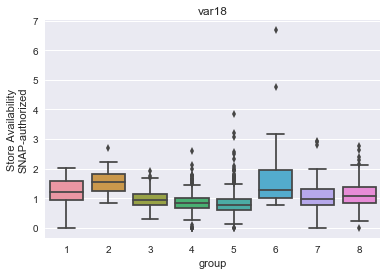

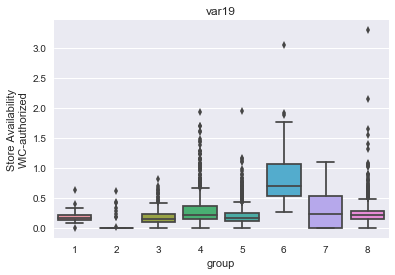

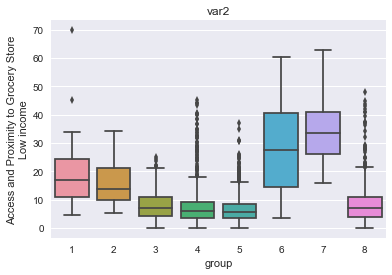

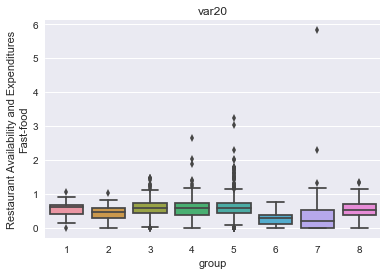

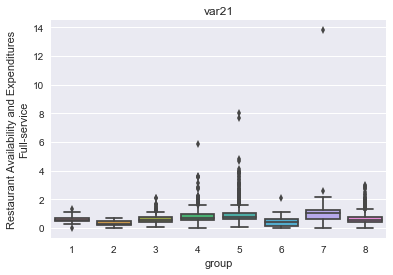

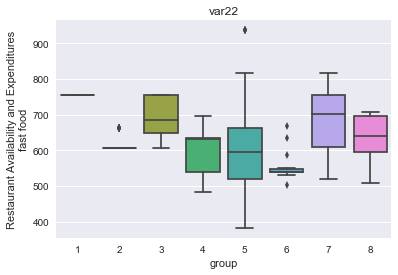

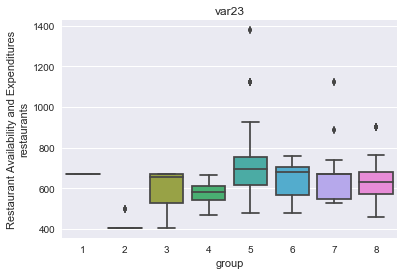

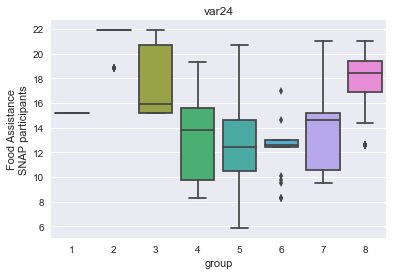

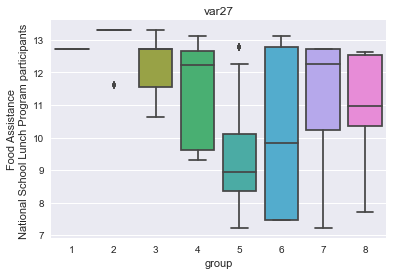

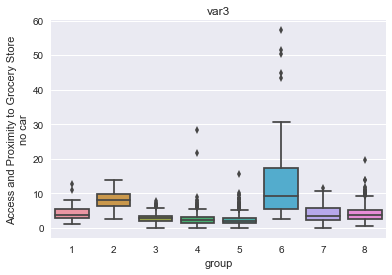

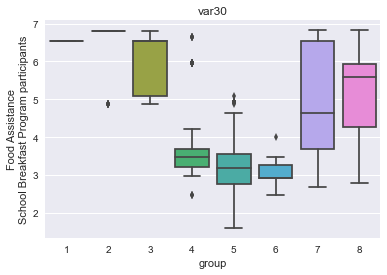

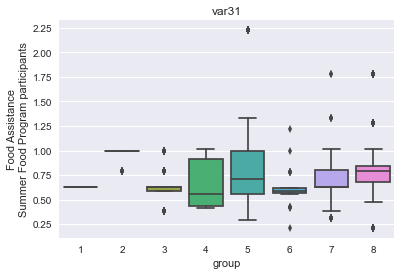

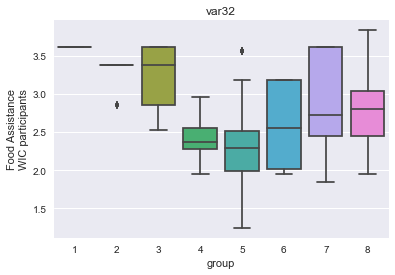

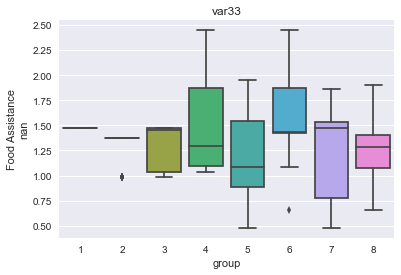

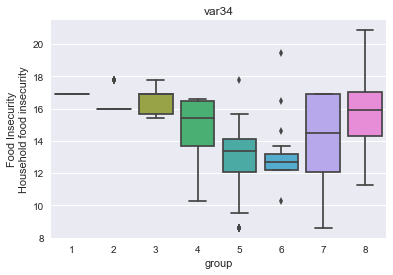

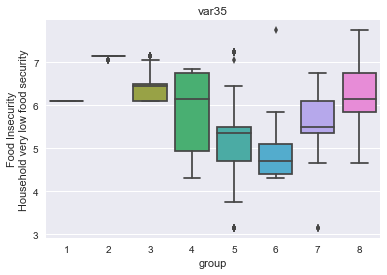

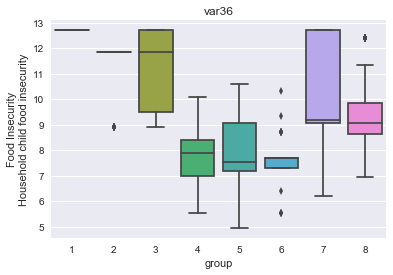

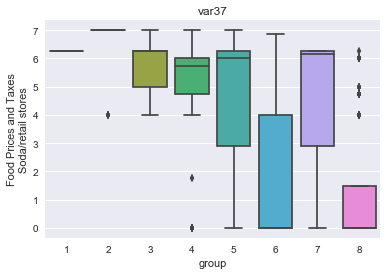

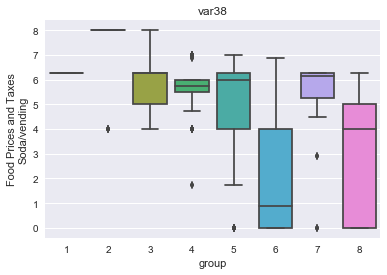

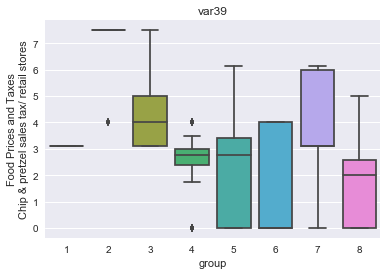

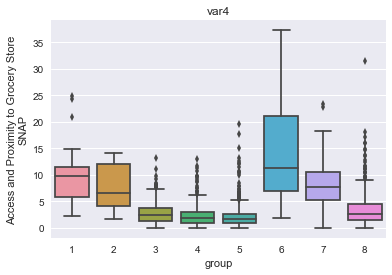

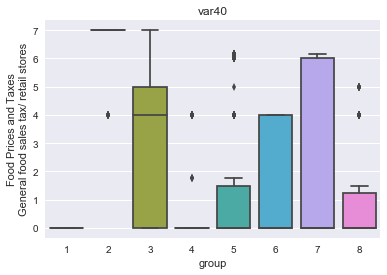

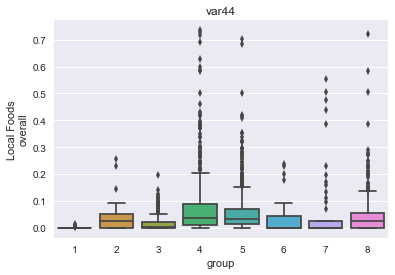

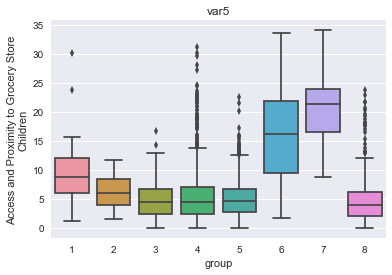

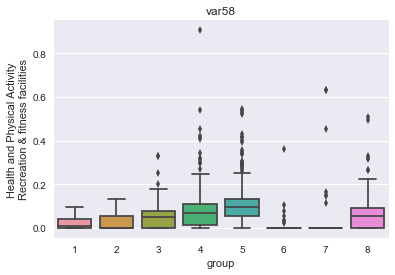

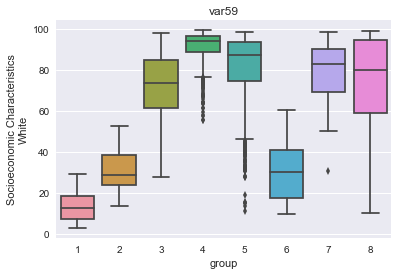

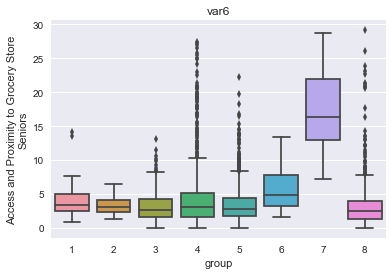

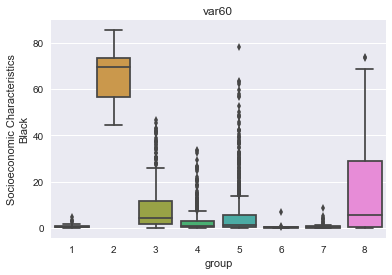

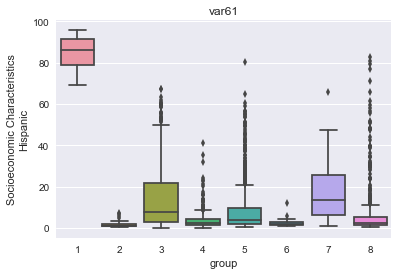

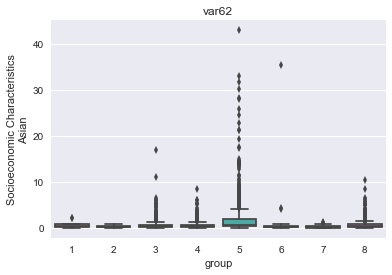

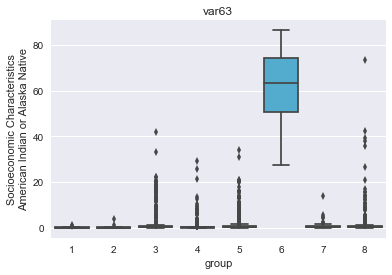

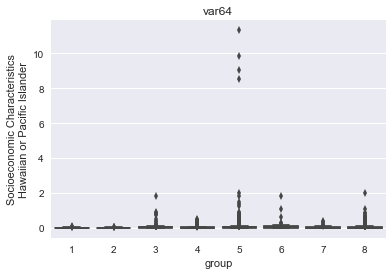

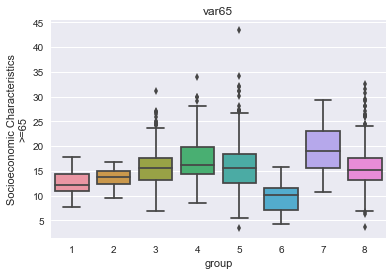

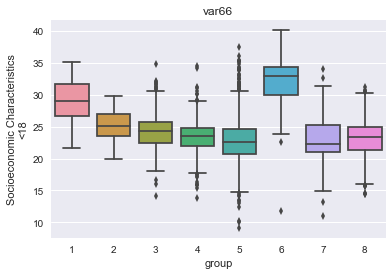

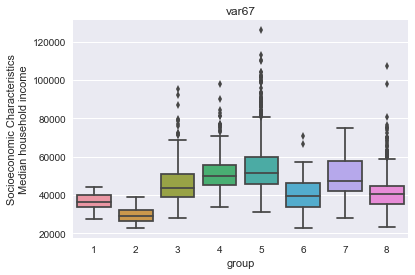

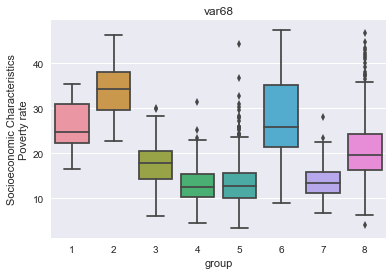

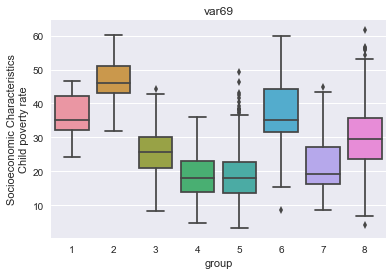

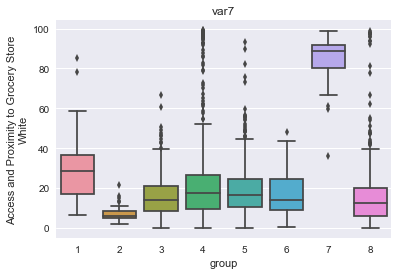

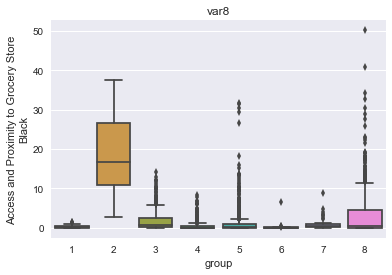

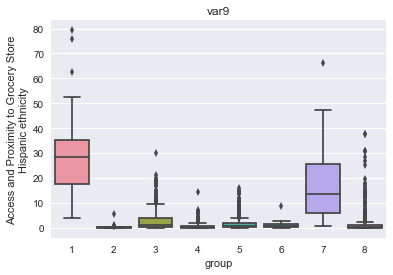

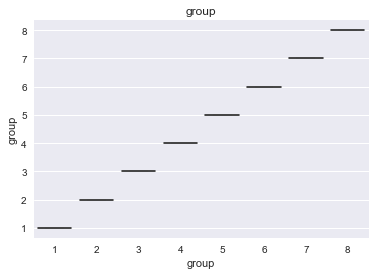

In [1169]:
features=df.columns
Box_plot_by_var(features, df, by='group', order=[1,2,3,4,5,6,7,8])

In [1142]:
race_var_list=list()
for v in var_info_df.index:
    if var_info_df.loc[v]['Category Code']=='SOCIOECONOMIC' and var_info_df.loc[v]['Subcategory Name']=='Race':
        race_var_list.append((var_info_df.loc[v]['Sub_subcategory Name'], v))
print (race_var_list)

[('White', 'var59'), ('Black', 'var60'), ('Hispanic', 'var61'), ('Asian', 'var62'), ('American Indian or Alaska Native', 'var63'), ('Hawaiian or Pacific Islander', 'var64')]


In [49]:
#stacked percentage plot with standard deviation

import numpy as np
import matplotlib.pyplot as plt

def Bar_race(groups_to_plot, df):
    N=len(groups_to_plot)
    whitemeans=np.empty(N)
    whitestd=np.empty(N)
    blackmeans=np.empty(N)
    blackstd=np.empty(N)
    asianmeans=np.empty(N)
    asianstd=np.empty(N)
    hispmeans=np.empty(N)
    hispstd=np.empty(N)
    Ame_Ind_Alkmeans=np.empty(N)
    Ame_Ind_Alkstd=np.empty(N)
    Hawa_Islandmeans=np.empty(N)
    Hawa_Islandstd=np.empty(N)

    groups=groups_to_plot

    for n, group in enumerate(groups):
        df_group=df[df['group']==group]
        whitemeans[n]=np.mean(df_group['var59'])
        whitestd[n]=np.std(df_group['var59'])

        blackmeans[n]=np.mean(df_group['var60'])
        blackstd[n]=np.std(df_group['var60'])

        asianmeans[n]=np.mean(df_group['var62'])
        asianstd[n]=np.std(df_group['var62'])

        hispmeans[n]=np.mean(df_group['var61'])
        hispstd[n]=np.std(df_group['var61'])

        Ame_Ind_Alkmeans[n]=np.mean(df_group['var63'])
        Ame_Ind_Alkstd[n]=np.std(df_group['var63'])

        Hawa_Islandmeans[n]=np.mean(df_group['var64'])
        Hawa_Islandstd[n]=np.std(df_group['var64'])

    width = 0.35       # the width of the bars: can also be len(x) sequence

    ind = np.arange(N)

    p1=plt.bar(ind, whitemeans, width, color='r', yerr=whitestd)
    p2=plt.bar(ind, blackmeans, width, color='m', bottom=whitemeans, yerr=blackstd)
    p3=plt.bar(ind, hispmeans, width, color='g', bottom=sum([whitemeans,blackmeans]), yerr=hispstd)
    p4=plt.bar(ind, asianmeans, width, color='y', bottom=sum([whitemeans, blackmeans, hispmeans]), yerr=asianstd)
    p5=plt.bar(ind, Ame_Ind_Alkmeans, width, color='b', bottom=sum([whitemeans, blackmeans, hispmeans, asianmeans]), yerr=Ame_Ind_Alkstd)
    p6=plt.bar(ind, Hawa_Islandmeans, width, color='purple', 
            bottom=np.sum([whitemeans,blackmeans,hispmeans,asianmeans,Ame_Ind_Alkmeans]), yerr=Hawa_Islandstd)

    plt.legend((p1[0], p2[0],p3[0], p4[0],p5[0], p6[0]), ('White', 'Black', 
                                                          'Hispanic', 'Asian','American Indian or Alaska Native', 
                                                          'Hawaiian or Pacific Islander'), bbox_to_anchor=(1.04,1))
    plt.xticks(range(N), ['cluster_'+str(g) for g in groups_to_plot], rotation=45)
    plt.ylim(0, 110)
    plt.show()

In [1278]:
def Bar_age(groups, df):
    N=len(groups)
    print (N)
    under_18_means=np.empty(N)
    under_18_std=np.empty(N)
    above_65_means=np.empty(N)
    above_65_std=np.empty(N)

    for n, group in enumerate(groups):
        df_group=df[df['group']==group]

        under_18_means[n]=np.mean(df_group['var66'])
        under_18_std[n]=np.std(df_group['var66'])
        
        above_65_means[n]=np.mean(df_group['var65'])
        above_65_std[n]=np.std(df_group['var65'])

    width = 0.35       # the width of the bars: can also be len(x) sequence

    ind = np.arange(N)

    p1=plt.bar(ind, under_18_means, width, color='r', yerr=under_18_std)
    #p2=plt.bar(ind, fr18to65_means, width, color='r', bottom=under_18_means, yerr=fr18to65_std)
    p2=plt.bar(ind, above_65_means, width, color='y', bottom=sum([under_18_means]), yerr=above_65_std)
    
    print (under_18_means)

    plt.legend((p1[0], p2[0]), ('<18 years', '>=65 years'), bbox_to_anchor=(1.04,1))
    plt.xticks(range(N), ['cluster_'+str(g) for g in groups], rotation=45)
    plt.ylim(0, 50)
    plt.show()

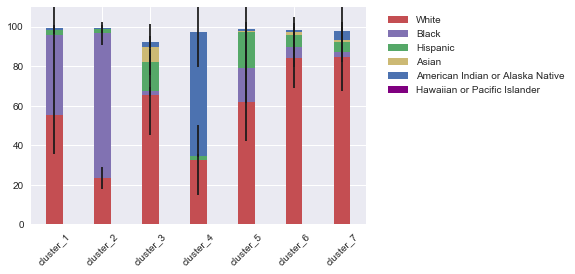

In [154]:
Bar_race(set(labels),df)

8
[ 29.13540224  25.11715849  24.24797612  23.36096896  22.8686152
  31.83320265  22.96148484  23.22579332]


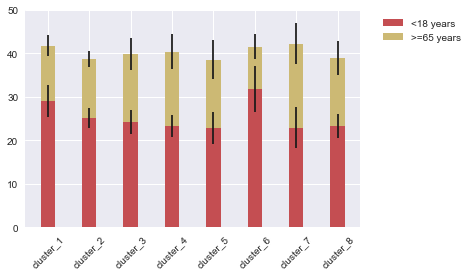

In [1279]:
Bar_age(list(set(labels)),df)

In [1147]:
age_var_list=list()
for v in var_info_df.index:
    if var_info_df.loc[v]['Category Code']=='SOCIOECONOMIC' and var_info_df.loc[v]['Subcategory Name']=='Age':
        age_var_list.append((var_info_df.loc[v]['Sub_subcategory Name'], v))
print (age_var_list)

[('>=65', 'var65'), ('<18', 'var66')]


In [1345]:
def Bar_features(groups, df, features, group_colors,  nrow, ncol, size):
    N=len(groups)
    print (N)
    
    for i,var in enumerate(features):
        plt.subplot(nrow, ncol, i+1)
        means=np.empty(N)
        stds=np.empty(N)
        max_values=list()
        for n, group in enumerate(groups):
            df_group=df[df['group']==group]

            means[n]=np.mean(df_group[var])
            stds[n]=np.std(df_group[var])
            max_values.append(np.mean(df_group[var])+np.std(df_group[var]))

        width = 1       # the width of the bars: can also be len(x) sequence

        ind = np.arange(N)

        plt.bar(ind, means, width, yerr=stds, color=group_colors)

        if var in var_info_df.index:
            plt.ylabel(str(var_info_df.loc[var]['Category Name'])+'\n'+str(var_info_df.loc[var]['Sub_subcategory Name']), size=size)            
        else: 
            plt.ylabel(var, size=size)

        plt.xticks(range(N), ['cluster_'+str(g) for g in groups], rotation=45, size=size)
        plt.yticks(size=size)

        plt.ylim(0, max(max_values))
    plt.show()

8


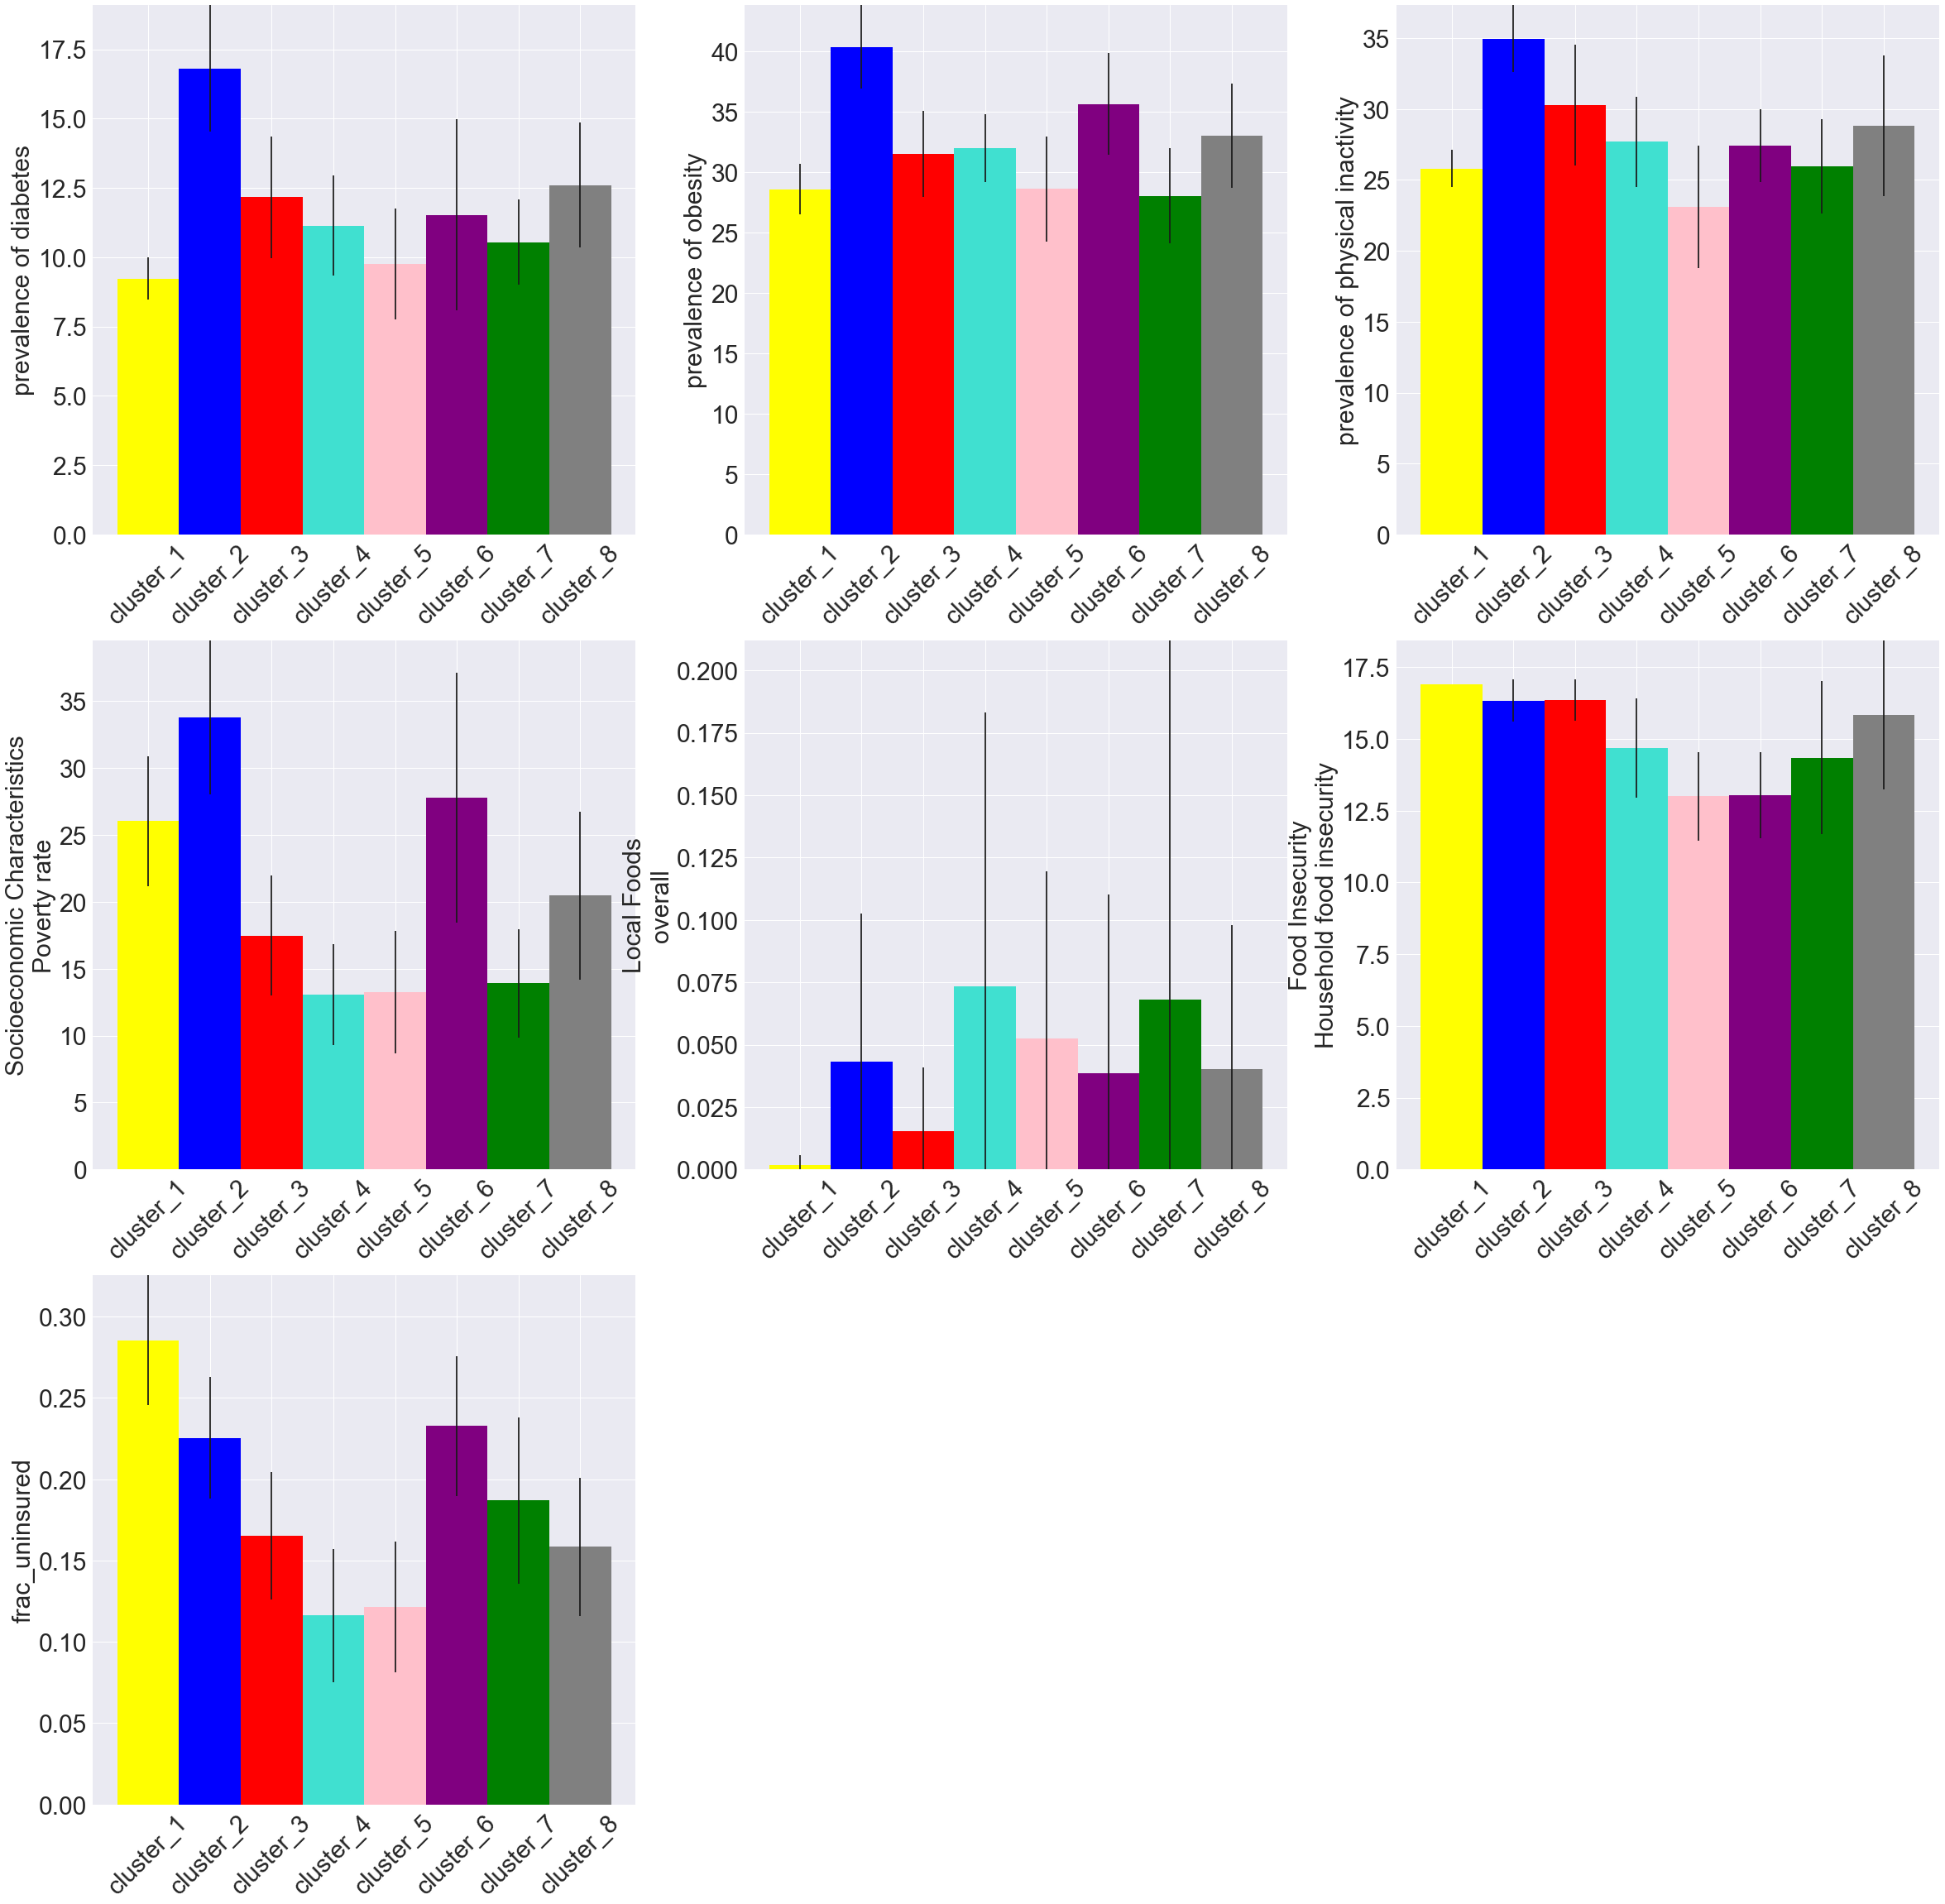

In [1346]:
plt.figure(facecolor="w", figsize=(40,40))
features=['prevalence of diabetes','prevalence of obesity','prevalence of physical inactivity']
features.extend(['var'+str(n) for n in [1,20,68,33]])
features.append('frac_uninsured')

Bar_features([1,2,3,4,5,6,7,8], df, features, group_colors, 3,3, 30)

    #if c in var_info_df.index:
        #plt.ylabel(str(var_info_df.loc[c]['Category Name'])+'\n'+str(var_info_df.loc[c]['Sub_subcategory Name']))            
    #else: 
    #plt.ylabel('var68')

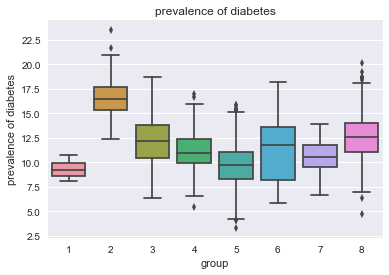

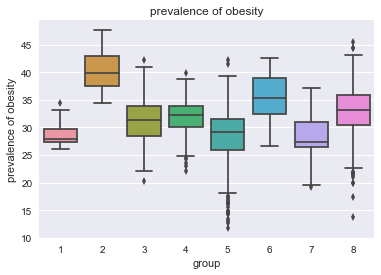

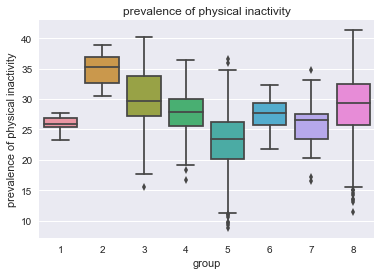

In [1309]:
features=['prevalence of diabetes','prevalence of obesity','prevalence of physical inactivity']
data=df
Box_plot_by_var(features, data, by='group', order=[1,2,3,4,5,6,7,8])

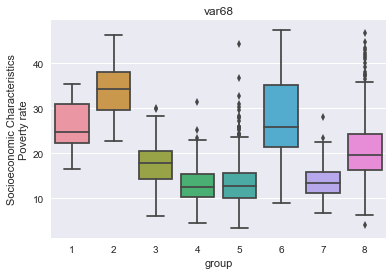

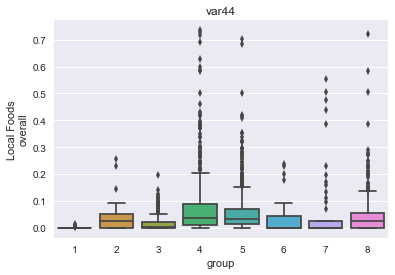

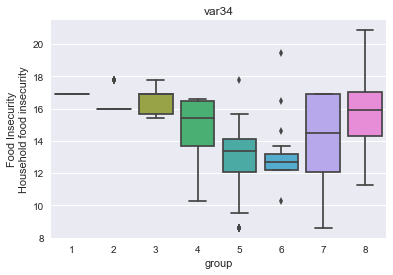

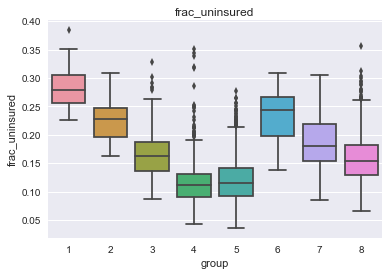

In [1310]:
features=['var'+str(n) for n in [68,44,34]]
features.append('frac_uninsured')
Box_plot_by_var(features, df, by='group', order=[1,2,3,4,5,6,7,8])

In [1285]:
df['clusters']=df['group'].apply((lambda x:'cluster_'+str(x)))
df[['clusters']].to_csv('C:/Users/cathy/Capstone_project_1/Datasets/cluster_groups.csv')

In [1152]:
xticks=[str(var_info_df.loc[c]['Category Name'])+'\n'
        +str(var_info_df.loc[c]['Sub_subcategory Name']) if c in var_info_df['Category Name'].keys() else c for c in features]
print (xticks)

['Socioeconomic Characteristics\nPoverty rate', 'Local Foods\noverall', 'Food Insecurity\nHousehold food insecurity', 'frac_uninsured']


[[  5.95000000e+02   6.76000000e+02   2.21182605e-02   2.00000000e+00]
 [  1.48000000e+03   1.49100000e+03   2.79079703e-02   2.00000000e+00]
 [  2.47300000e+03   2.47600000e+03   3.17769484e-02   2.00000000e+00]
 ..., 
 [  6.21100000e+03   6.22100000e+03   2.96565454e+00   9.23000000e+02]
 [  6.21900000e+03   6.22200000e+03   3.05981094e+00   2.60000000e+03]
 [  6.22000000e+03   6.22300000e+03   3.70681255e+00   3.11300000e+03]]


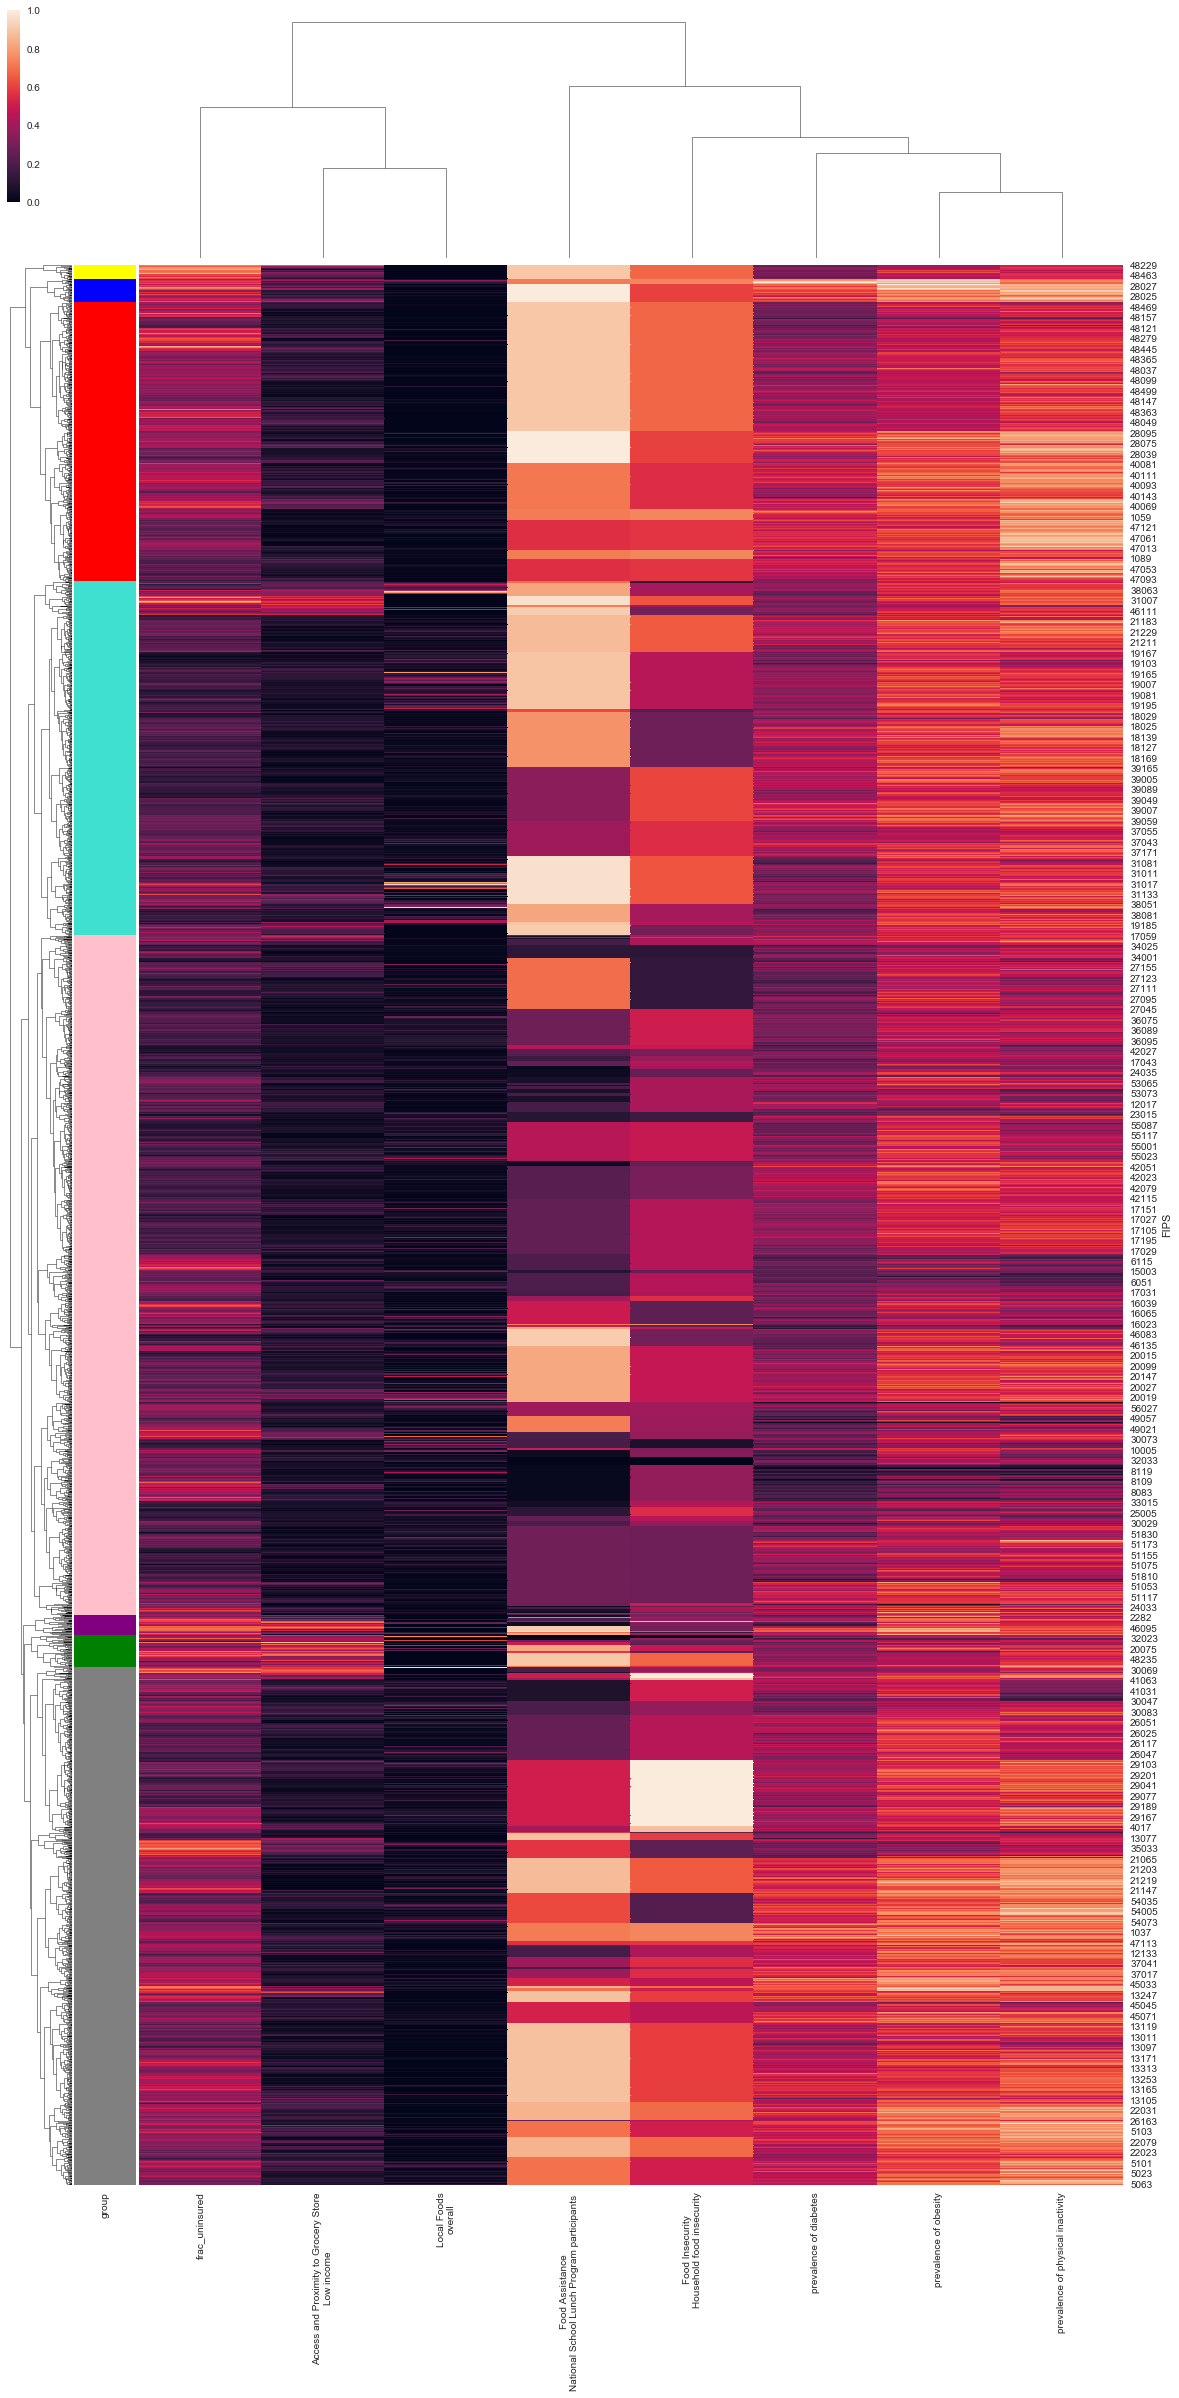

In [1286]:
import seaborn as sns

sns.set_palette("RdBu_r")


features=['var'+str(n) for n in [2,27,44,34]]
features.append('frac_uninsured')
features.extend(['prevalence of diabetes','prevalence of obesity','prevalence of physical inactivity'])
xticks=[str(var_info_df.loc[c]['Category Name'])+'\n'
        +str(var_info_df.loc[c]['Sub_subcategory Name']) if c in var_info_df['Category Name'].keys() else c for c in features]

print (Z)
normed_df['group']=labels
lut = dict(zip([1,2,3,4,5,6,7,8], group_colors))

row_colors = normed_df['group'].map(lut)
sns.clustermap(normed_df[features], method='average',row_linkage=Z, 
               row_colors=row_colors, figsize=(20,40), xticklabels=xticks)
plt.show()